In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
dataDir="Data"

In [3]:
dataFiles=os.listdir(dataDir)
dataFiles

['bnqavmilok.json',
 'oeqmndxzfx.json',
 'fmcdmnddnf.json',
 'dxbssreubf.json',
 'uypzyojnzw.json',
 'htiyuuhyyv.json']

In [4]:
rawObj=[]
for name in dataFiles:
    with open(os.path.join(dataDir,name),"r") as f:
        obj=json.load(f)
        rawObj.append(obj)

In [5]:
#every round game data 
rawObj[0][0]["data"]["winner"]

'1'

In [7]:
round(3.1111111,2)

3.11

In [12]:
#every steps per round
rawObj[0][0]["data"]["steps"][2]["ai_winning_rate"]

46.875

In [20]:
winnerList=[]
playerList=[]
stepList=[]
roundNoList=[]
AIHelpList=[]
AIAverageDifficulty=[]
AIAverageWinRate=[]
for player in range(len(rawObj)):
    # print("player: {}".format(player))
    for r in range(len(rawObj[player])):
        # print("player: {} round: {}".format(player,round))
        # print("winner: {}".format(rawObj[player][round]["data"]['winner']))
        playerList.append(player)
        winnerList.append(rawObj[player][r]["data"]['winner'])
        stepList.append(rawObj[player][r]["data"]['total_steps'])
        roundNoList.append(r)
        if r<2:
            AIHelpList.append(0)
        if r<4 and r >=2:
            AIHelpList.append(1)
        if r>3:
            AIHelpList.append(0)
            
        gameDifficulty=0
        AIWinRate=0
        steps_len=rawObj[player][r]["data"]['total_steps']
        for step in range(steps_len):
            if rawObj[player][r]["data"]["steps"][step]["difficulty"]!=None:
                gameDifficulty+=rawObj[player][r]["data"]["steps"][step]["difficulty"]
            if rawObj[player][r]["data"]["steps"][step]["ai_winning_rate"]!=None:
                AIWinRate+=rawObj[player][r]["data"]["steps"][step]["ai_winning_rate"]
        
        AIAverageDifficulty.append(round(gameDifficulty/((steps_len-1)/2),2))
        AIAverageWinRate.append(round(AIWinRate/((steps_len-1)/2),2))
        

In [21]:
pdData=pd.DataFrame()
pdData['participant']=playerList
pdData['rounds']=roundNoList
pdData['winner']=winnerList
pdData['total_steps']=stepList
pdData["ai_help"]=AIHelpList
pdData["ai_average_difficulty"]=AIAverageDifficulty
pdData["ai_average_win_rate"]=AIAverageWinRate
pdData

,participant,rounds,winner,total_steps,ai_help,ai_average_difficulty,ai_average_win_rate
0,0,0,1,41,0,2.00,55.52
1,0,1,1,81,0,2.00,47.71
2,0,2,1,41,1,2.00,63.85
3,0,3,1,47,1,2.00,60.01
4,0,4,1,47,0,2.00,52.54
5,0,5,1,49,0,2.00,56.73
6,1,0,1,57,0,2.00,75.37
7,1,1,1,45,0,2.00,66.29
8,1,2,1,47,1,2.00,56.84
9,1,3,1,41,1,2.00,64.06


Text(0, 0.5, 'Number of games won')

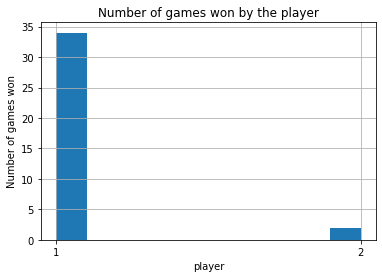

In [32]:
#the number of game won for 6 participants with each 6 games
pdData['winner'].hist()
plt.title("Number of games won by the player")
plt.xlabel("player")
plt.ylabel("Number of games won")

In [26]:
pdDataNoAI=pdData[pdData["ai_help"]==0].copy()
pdDataNoAI

,participant,rounds,winner,total_steps,ai_help,ai_average_difficulty,ai_average_win_rate
0,0,0,1,41,0,2.0,55.52
1,0,1,1,81,0,2.0,47.71
4,0,4,1,47,0,2.0,52.54
5,0,5,1,49,0,2.0,56.73
6,1,0,1,57,0,2.0,75.37
7,1,1,1,45,0,2.0,66.29
10,1,4,1,61,0,2.0,70.03
11,1,5,1,87,0,2.0,76.48
12,2,0,1,43,0,2.0,61.90
13,2,1,1,39,0,2.0,64.53


Text(0, 0.5, 'Number of games won')

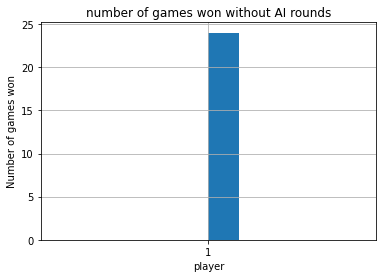

In [30]:
pdDataNoAI['winner'].hist()
plt.title("number of games won without AI rounds")
plt.xlabel("player")
plt.ylabel("Number of games won")

In [64]:
#steps measure
beforeT=pdDataNoAI[pdDataNoAI["rounds"]<2].groupby("participant").mean()["total_steps"]

In [73]:
beforeT

participant
0    61.0
1    51.0
2    41.0
3    58.0
4    39.0
5    43.0
Name: total_steps, dtype: float64

In [76]:
afterT=pdDataNoAI[pdDataNoAI["rounds"]>3].groupby("participant").mean()["total_steps"]

In [77]:
afterT

participant
0     48.0
1     74.0
2     53.0
3     98.0
4     70.0
5    101.0
Name: total_steps, dtype: float64

In [80]:
pdTotalStep=pd.concat([beforeT,afterT],axis=1)
pdTotalStep.columns=["before AI help","after AI help"]

In [82]:
#count the step for each player according to the mean of same test type 
#before AI help = mean of total step from first two rounds of game 
#after AI help = mean of total step from last two rounds of game 
pdTotalStep

,before AI help,after AI help
participant,,
0,61.0,48.0
1,51.0,74.0
2,41.0,53.0
3,58.0,98.0
4,39.0,70.0
5,43.0,101.0


In [129]:
#transpose the index and columns 
pdTotalStep.transpose()

participant,0,1,2,3,4,5
before AI help,61.0,51.0,41.0,58.0,39.0,43.0
after AI help,48.0,74.0,53.0,98.0,70.0,101.0


Text(0, 0.5, 'Number of steps')

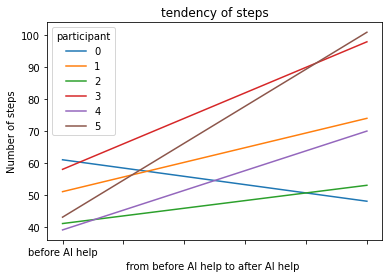

In [131]:
pdTotalStep.transpose().plot.line()
plt.title("tendency of steps")
plt.xlabel("from before AI help to after AI help ")
plt.ylabel("Number of steps")

In [132]:
beforeTWinRate=pdDataNoAI[pdDataNoAI["rounds"]<2].groupby("participant").mean()["ai_average_win_rate"]
afterTWinRate=pdDataNoAI[pdDataNoAI["rounds"]>3].groupby("participant").mean()["ai_average_win_rate"]

In [137]:
pdWinRate=pd.concat([beforeTWinRate,afterTWinRate],axis=1)
pdWinRate.columns=["before AI help","after AI help"]
pdWinRate

,before AI help,after AI help
participant,,
0,51.615,54.635
1,70.830,73.255
2,63.215,65.420
3,74.810,57.050
4,60.475,58.100
5,61.700,68.855


Text(0, 0.5, 'AI win rate')

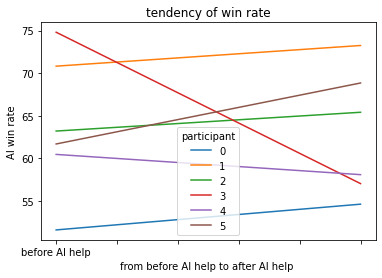

In [140]:
#A larger downward trend indicates a higher player level
pdWinRate.transpose().plot.line()
plt.title("tendency of win rate")
plt.xlabel("from before AI help to after AI help ")
plt.ylabel("AI win rate")